In [1]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
a=pd.read_csv('ipl data.csv')

In [3]:
#read ipl.csv file and print first 5 records

a.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#check total number of columns,entries note down your findings

a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
# find null values 

a.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

Umpire3 has more than 75% null value there for we delete the column using drop()
and then remaining null value we delete using dropna()

In [6]:
#drop umpire3 column as it contains more than 75% of null values

a.drop(['umpire3'],axis=1,inplace=True)

In [7]:
a.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [8]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column

a.dropna(inplace=True)

Using dropna we delete all null values

In [9]:
a.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

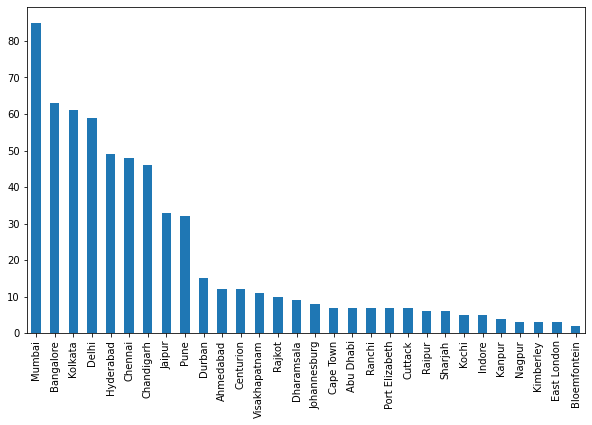

In [10]:
#which city hosted most number of matches?
#draw bar plot and write down your insights

plt.figure(figsize=(10,6))
a['city'].value_counts().plot(kind='bar')
plt.show()

In [11]:
#find all venue of mumbai city

z=np.array(a['venue'].loc[a['city']=='Mumbai'])
ven=np.unique(z)
ven

array(['Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Wankhede Stadium'], dtype=object)

to find all venue from mumbai
first we create numpy array and then we add into that mumbai city and venue
then we use unique fuction to find the various stadium in mumbai

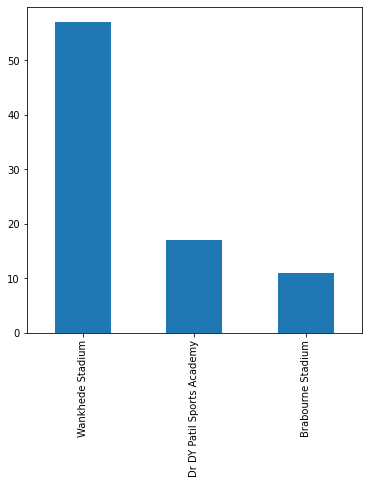

In [12]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)

plt.figure(figsize=(6,6))
a['venue'].loc[a['city']=='Mumbai'].value_counts().plot(kind='bar')
plt.show()

mumbai's Wankhede Stadium is most number of matches played

In [13]:
#what is the preferred choice after winning a toss in mumbai

a['toss_decision'].loc[a['city']=='Mumbai'].value_counts()

field    51
bat      34
Name: toss_decision, dtype: int64

Team choose Field after winning toss in Mumbai

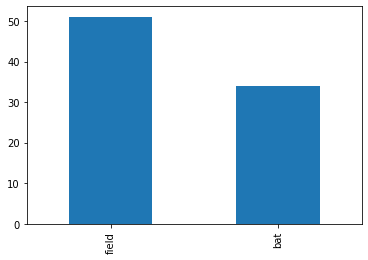

In [14]:
#graphical representation of above question

a['toss_decision'].loc[a['city']=='Mumbai'].value_counts().plot(kind='bar')
plt.show()

In [15]:
#which team won most number of toss

a['toss_winner'].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Mumbai Indians won most number of toss (83)

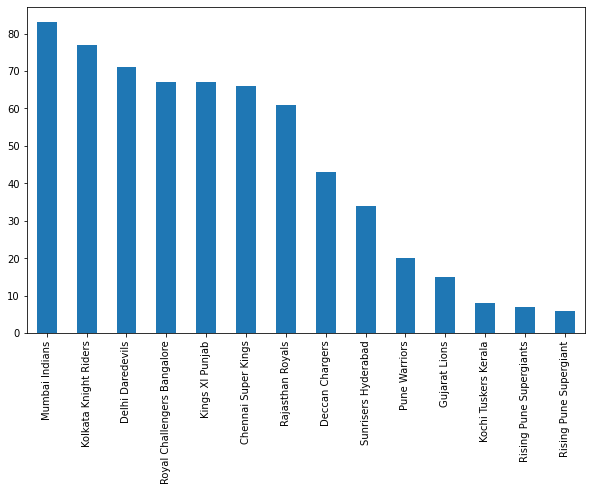

In [16]:
#show graphical representation of above question

plt.figure(figsize=(10,6))
a['toss_winner'].value_counts().plot(kind='bar')
plt.show()

In [17]:
#find what mumbai indians preferred after winning a toss?

a['toss_decision'].loc[a['toss_winner']=='Mumbai Indians'].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

FIELD preferred mumbai indians after winning a toss

In [18]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings

a['winner'].loc[((a['team1']=='Mumbai Indians') | (a['team2']=='Mumbai Indians')) & ((a['team1']=='Chennai Super Kings') | (a['team2']=='Chennai Super Kings')) & (a['result']=='normal')].value_counts()

Mumbai Indians         12
Chennai Super Kings     9
Name: winner, dtype: int64

Mumbai Indians won most match head to head vs Chennai Super Kings

In [19]:
#Which team won most of the matches in mumbai?

a["winner"].loc[a['city']=="Mumbai"].value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

Mumbai Indians won most of the matches in mumbai

In [20]:
#how many times each team won the toss and won the match

a['winner'].loc[a['toss_winner']==a['winner']].value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

Mumbai Indians won most matches after winning a toss

In [21]:
#how many times each team won the toss and won the match in mumbai

a['winner'].loc[(a["toss_winner"]==a["winner"]) & (a['city']=='Mumbai')].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

Mumbai Indians won most matches after winning a toss in Mumbai

In [22]:
#which venue hosted most number of matches

a["venue"].value_counts()

M Chinnaswamy Stadium                                   63
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

M Chinnaswamy Stadium hosted most number of matches

In [23]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?

a['venue'].loc[(a['venue']=='M Chinnaswamy Stadium') & ((a['team1']=='Chennai Super Kings') | (a['team2']=='Chennai Super Kings'))].value_counts()

M Chinnaswamy Stadium    7
Name: venue, dtype: int64

7 matches chennai super kings played at M Chinnaswamy stadium.

In [24]:
#who won most matches at M Chinnaswamy stadium?

a['winner'].loc[a['venue']=='M Chinnaswamy Stadium'].value_counts()

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

Royal Challengers Bangalore won most matches at M Chinnaswamy stadium

# Year Wise Analysis

In [25]:
#matches played in each year

d=a.groupby('season')
for i in d:
    print(i[0])
    print(i[1])

2008
      id  season        city        date                        team1  \
59    60    2008   Bangalore  2008-04-18        Kolkata Knight Riders   
60    61    2008  Chandigarh  2008-04-19          Chennai Super Kings   
61    62    2008       Delhi  2008-04-19             Rajasthan Royals   
62    63    2008      Mumbai  2008-04-20               Mumbai Indians   
63    64    2008     Kolkata  2008-04-20              Deccan Chargers   
64    65    2008      Jaipur  2008-04-21              Kings XI Punjab   
65    66    2008   Hyderabad  2008-04-22              Deccan Chargers   
66    67    2008     Chennai  2008-04-23          Chennai Super Kings   
67    68    2008   Hyderabad  2008-04-24              Deccan Chargers   
68    69    2008  Chandigarh  2008-04-25              Kings XI Punjab   
69    70    2008   Bangalore  2008-04-26  Royal Challengers Bangalore   
70    71    2008     Chennai  2008-04-26        Kolkata Knight Riders   
71    72    2008      Mumbai  2008-04-27      

we create a group by season 
then we find the season wise data  

In [26]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)

yr=d.get_group(2013)
yr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


76 match played in 2013 season

In [27]:
#which city hosted most number of matches in 2013 

yr['city'].value_counts()

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

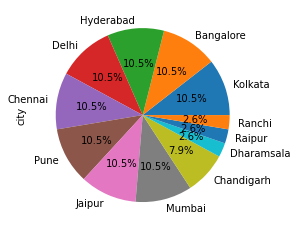

In [28]:
#Draw pie diagram city hosted of matches in 2013 

yr['city'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

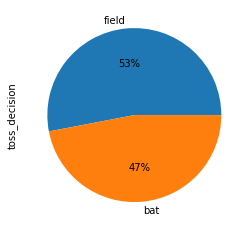

In [29]:
#find what mumbai indians preferred after winning a toss plot a graph?

a['toss_decision'].loc[a['toss_winner']=='Mumbai Indians'].value_counts().plot(kind='pie',autopct='%1.f%%')
plt.show()

FIELD preferred mumbai indians after winning a toss

In [30]:
#how many matches tie in 2013 season

yr['result'].loc[yr['result']=='tie'].value_counts()

tie    2
Name: result, dtype: int64

2 match tie in 2013 season